In [1]:
# 数据集在百度云上的DataSets目录下

In [2]:
import pandas as pd

In [63]:
# 测试集和训练集是相互排斥的
# 调用read_csv函数，读取 训练数据 并存到df_train中
df_train = pd.read_csv('../../../Datasets/Breast-Cancer/breast-cancer-train.csv')
print(df_train)
# 获取测试数据并存到df_test中
df_test = pd.read_csv('../../../Datasets/Breast-Cancer/breast-cancer-test.csv')
# print(df_test)

     Unnamed: 0  Clump Thickness  Cell Size  Type
0           163                1          1     0
1           286               10         10     1
2           612               10         10     1
3           517                1          1     0
4           464                1          1     0
5           277                1          1     0
6           408                3          2     0
7           104               10         10     1
8           114                3          2     0
9           627                1          1     0
10          545                1          1     0
11          467                6          6     1
12           92                1          1     0
13            7                1          2     0
14           89                1          1     0
15          528                1          3     0
16          380                1          1     0
17          521                1          1     0
18          539                1          1     0


In [20]:
# 选取‘Clump Thickness(肿块厚度)’和‘Cell Size(细胞尺寸)’作为特征，构建 测试集 中的正负分类样本
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]
# print(df_test_negative)

     Clump Thickness  Cell Size
0                  1          2
1                  1          1
2                  1          1
4                  1          1
5                  1          1
6                  3          2
10                 1          1
12                 1          1
13                 1          1
14                 1          1
16                 1          1
21                 1          1
23                 1          1
25                 1          1
26                 1          1
28                 1          1
30                 1          1
31                 1          1
32                 1          1
34                 1          1
35                 1          1
36                 1          1
38                 1          1
40                 1          1
41                 3          3
43                 1          1
44                 1          1
45                 1          1
46                 2          2
47                 4          5
..      

In [21]:
# 导入matplotlib工具包中的pyplot画图
import matplotlib.pyplot as plt

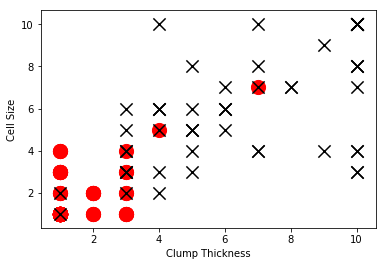

In [22]:
# 绘制良性肿瘤样本点，标记为红色的o
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker = 'o', s = 200, c = 'red')
# 绘制恶性肿瘤样本点，标记为黑色的x
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker = 'x', s = 150, c = 'black')
# 绘制 x, y 轴的说明
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
# 显示
plt.show()

In [23]:
# 导入numpy 工具包
import numpy as np

In [29]:
# 利用numpy中的random函数随机采样直线的截距(intercept)和系数(coef)
intercept = np.random.random([1])
coef = np.random.random([2])
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
print(intercept)
print(coef)
print(lx)
print(ly)

[ 0.87207417]
[ 0.0585905   0.82067718]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[-1.06262754 -1.13402041 -1.20541329 -1.27680616 -1.34819903 -1.41959191
 -1.49098478 -1.56237765 -1.63377053 -1.7051634  -1.77655627 -1.84794915]


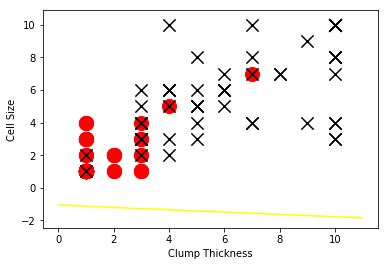

In [31]:
# 随机初始化一个二分类器，使用一条直线来划分良/恶性肿瘤，直线的斜率和截距决定了直线的走向，统称为模型的参数，
# 也是分类器需要通过学习从训练数据中得到的。
# 最初，随机初始化参数的分类器的性能表现就是下图

# 绘制一条随机直线
plt.plot(lx, ly, c = 'yellow')
# 良性 红色 o
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker = 'o', s = 200, c = 'red')
# 恶性 黑色 x
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker = 'x', s = 150, c = 'black')
# x, y
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [32]:
# 随着使用一定量的训练样本，分类器所表现的性能大幅度提升
# 导入 sklearn 中的逻辑斯蒂回归分类器
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [59]:
# 使用前 10 条训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
# score 检验 => 训练之后的准确率
print('Testing accuracy (10 training samples): ', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (10 training samples):  0.868571428571


In [60]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
print(intercept)
print(coef)

[-1.51522787]
[-0.10721332  0.48314152]


In [61]:
# 分类面应该是lx * coef[0] + ly * coef[1] + intercept = 0, 映射到 二维 平面之后就是
ly = (-intercept - lx * coef[0]) / coef[1]
print(ly)

[ 3.1361988   3.35810752  3.58001624  3.80192495  4.02383367  4.24574239
  4.4676511   4.68955982  4.91146854  5.13337725  5.35528597  5.57719469]


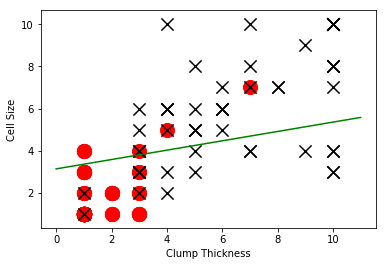

In [62]:
# 训练
plt.plot(lx, ly, c = 'green')
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker = 'o', s = 200, c = 'red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker = 'x', s = 150, c = 'black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [47]:
# 使用所有训练样本学习直线的系数和截距
lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
# 训练完所有的准确率
print('Testing accuracy (all training samples): ', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (all training samples):  0.937142857143


In [57]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]
print(intercept)
print(coef)
print(ly)

[-4.67611309]
[ 0.59071861  0.7498354 ]
[ 6.23618609  5.44838838  4.66059067  3.87279296  3.08499525  2.29719754
  1.50939984  0.72160213 -0.06619558 -0.85399329 -1.641791   -2.42958871]


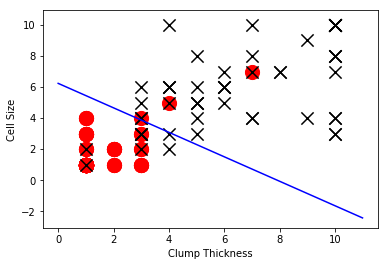

In [58]:
# 绘制训练完所有数据的图
plt.plot(lx, ly, c = 'blue')
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'], marker = 'o', s = 200, c = 'red')
plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'], marker = 'x', s = 150, c = 'black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()